# Import libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaborn
%matplotlib inline
import re
import seaborn as sns
from sklearn import tree
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

# Create CSV

In [80]:
with open('spambase.names') as spam:
 text = spam.read()
labels = re.findall(r'\n(\w*_?\W?):', text)
#labels.append('Class')
spamData = pd.read_csv('spambase.data', header=None, names=labels +['spam'])
# spam = spamData.pop('spam')

In [81]:
spamData.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [82]:
spamData

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


# Feature scaling

In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(spamData)

# Check duplicate Values

In [84]:
print(spamData.duplicated().sum())

391


# Remove duplicate Values

In [85]:
spamData=spamData.drop_duplicates()
(spamData.duplicated().sum())

0

# Remove null Values

In [86]:
spamData=spamData.dropna()

# After remove duplicate Values

In [87]:
spamData.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


# Outlier detection

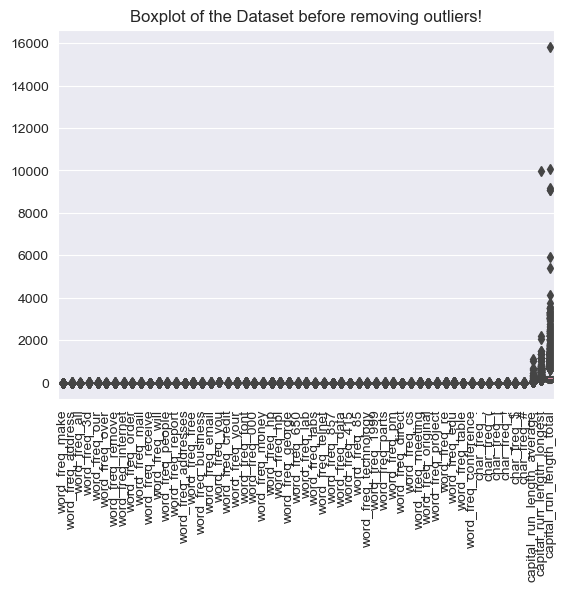

In [88]:
sns.boxplot(data=spamData.iloc[:, :-1])
plt.xticks(rotation=90)
plt.title("Boxplot of the Dataset before removing outliers!")
plt.show()

# Remove outliers

In [89]:
spamData = spamData.drop(spamData[spamData["capital_run_length_total"] > 3900].index)

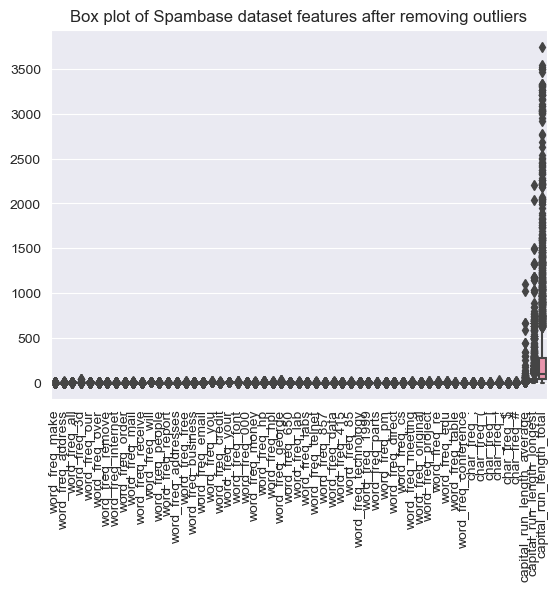

In [90]:
# Create box plot of features after removing outliers
sns.boxplot(data=spamData.iloc[:, :-1])
plt.xticks(rotation=90)
plt.title("Box plot of Spambase dataset features after removing outliers")
plt.show()

In [91]:
df=pd.DataFrame(data=scaled_data, columns= spamData.columns)

In [92]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4.601000e+03,4.601000e+03,4.601000e+03,4601.000000,4.601000e+03,4.601000e+03,4.601000e+03,4601.000000,4.601000e+03,4.601000e+03,...,4.601000e+03,4.601000e+03,4.601000e+03,4601.000000,4.601000e+03,4601.000000,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03
mean,1.853187e-17,2.779780e-17,2.470916e-17,0.000000,4.941832e-17,3.706374e-17,-2.470916e-17,0.000000,2.470916e-17,1.235458e-17,...,3.088645e-17,-7.412748e-17,1.544322e-17,0.000000,-2.470916e-17,0.000000,4.324103e-17,1.235458e-17,2.470916e-17,-4.941832e-17
std,1.000109e+00,1.000109e+00,1.000109e+00,1.000109,1.000109e+00,1.000109e+00,1.000109e+00,1.000109,1.000109e+00,1.000109e+00,...,1.000109e+00,1.000109e+00,1.000109e+00,1.000109,1.000109e+00,1.000109,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00
min,-3.424337e-01,-1.650719e-01,-5.567606e-01,-0.046900,-4.643144e-01,-3.502662e-01,-2.917939e-01,-0.262562,-3.233024e-01,-3.713644e-01,...,-1.584534e-01,-5.143065e-01,-1.551977e-01,-0.329912,-3.083549e-01,-0.103048,-1.321161e-01,-2.625994e-01,-4.656073e-01,-8.064037e-01
25%,-3.424337e-01,-1.650719e-01,-5.567606e-01,-0.046900,-4.643144e-01,-3.502662e-01,-2.917939e-01,-0.262562,-3.233024e-01,-3.713644e-01,...,-1.584534e-01,-5.143065e-01,-1.551977e-01,-0.329912,-3.083549e-01,-0.103048,-1.135824e-01,-2.369413e-01,-4.095278e-01,-8.064037e-01
50%,-3.424337e-01,-1.650719e-01,-5.567606e-01,-0.046900,-4.643144e-01,-3.502662e-01,-2.917939e-01,-0.262562,-3.233024e-01,-3.713644e-01,...,-1.584534e-01,-2.738561e-01,-1.551977e-01,-0.329912,-3.083549e-01,-0.103048,-9.189671e-02,-1.907567e-01,-3.105639e-01,-8.064037e-01
75%,-3.424337e-01,-1.650719e-01,2.764271e-01,-0.046900,1.007920e-01,-3.502662e-01,-2.917939e-01,-0.262562,-3.233024e-01,-1.231813e-01,...,-1.584534e-01,1.811501e-01,-1.551977e-01,0.056314,-9.684841e-02,-0.103048,-4.682327e-02,-4.707129e-02,-2.851691e-02,1.240074e+00
max,1.452700e+01,1.090096e+01,9.560519e+00,30.641278,1.440691e+01,2.112571e+01,1.828261e+01,27.441249,1.855779e+01,2.782844e+01,...,1.785384e+01,3.556066e+01,3.715432e+01,39.491909,2.410845e+01,46.086589,3.458704e+01,5.099205e+01,2.566085e+01,1.240074e+00


# Save the CSV file

In [93]:
spamData.to_csv('spamData.csv', index=False)

# Check spam valuve count (1) and non spam valuve count (0)

In [94]:
spamData['spam'].value_counts()

0    2529
1    1673
Name: spam, dtype: int64

In [95]:
spamData.info

<bound method DataFrame.info of       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32       

In [96]:
spamData.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,...,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000
mean,0.104329,0.112799,0.291678,0.063189,0.325800,0.096644,0.117694,0.108051,0.091875,0.248475,...,0.039951,0.141838,0.017363,0.281121,0.075604,0.045371,5.322680,49.378391,275.394336,0.398144
std,0.300191,0.454667,0.516139,1.353771,0.688366,0.276262,0.397630,0.410627,0.282348,0.657083,...,0.251767,0.231006,0.105815,0.843850,0.238373,0.435294,32.980361,126.713928,479.736935,0.489574
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.625250,7.000000,39.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.294000,15.000000,101.000000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.703500,44.000000,271.750000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,5.277000,4.081000,32.478000,6.003000,19.829000,1102.500000,2204.000000,3752.000000,1.000000


In [97]:
spamData.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# Assign features to x

In [98]:
#Drop spam column
x = spamData.drop('spam', axis=1)
x.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


#  Assign target variable to y

In [99]:
y = spamData['spam']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64

# Divide train and test data

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

# Train data count

In [101]:
x_train.shape

(2941, 57)

# Test data count

In [102]:
x_test.shape

(1261, 57)

# Train model using Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

# Predict using model

In [104]:
pred = model.predict(x_test)
pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [105]:
y_test

2875    0
413     1
2192    0
2921    0
2134    0
       ..
1891    0
917     1
1154    1
1870    0
2691    0
Name: spam, Length: 1261, dtype: int64

# Check accuracy

In [106]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,pred)
accuracy

0.908802537668517

# Confusing matrix

In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
cm

array([[679,  52],
       [ 63, 467]], dtype=int64)

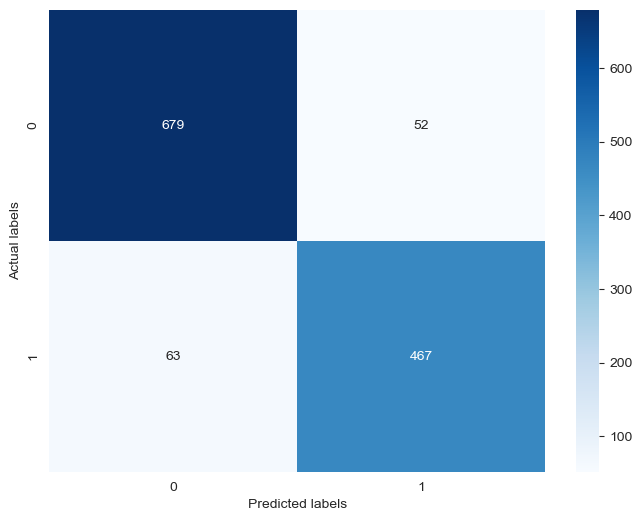

In [108]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.show()

In [109]:
clf = DecisionTreeClassifier(random_state=0,criterion='gini')
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

# Classification report

In [117]:
from sklearn.metrics import classification_report
predicted_labels = clf.predict(x_test)
classification_report = classification_report(y_test, predicted_labels)

Classification Report : 


              precision    recall  f1-score   support

           0       0.92      0.93      0.92       731
           1       0.90      0.88      0.89       530

    accuracy                           0.91      1261
   macro avg       0.91      0.90      0.91      1261
weighted avg       0.91      0.91      0.91      1261



In [111]:
result = pd.DataFrame(data=[y_test.values,pred], index = ['y_test','pred'])
result.transpose()

,y_test,pred
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
1256,0,0
1257,1,1
1258,1,1
1259,0,0


# Plot tree

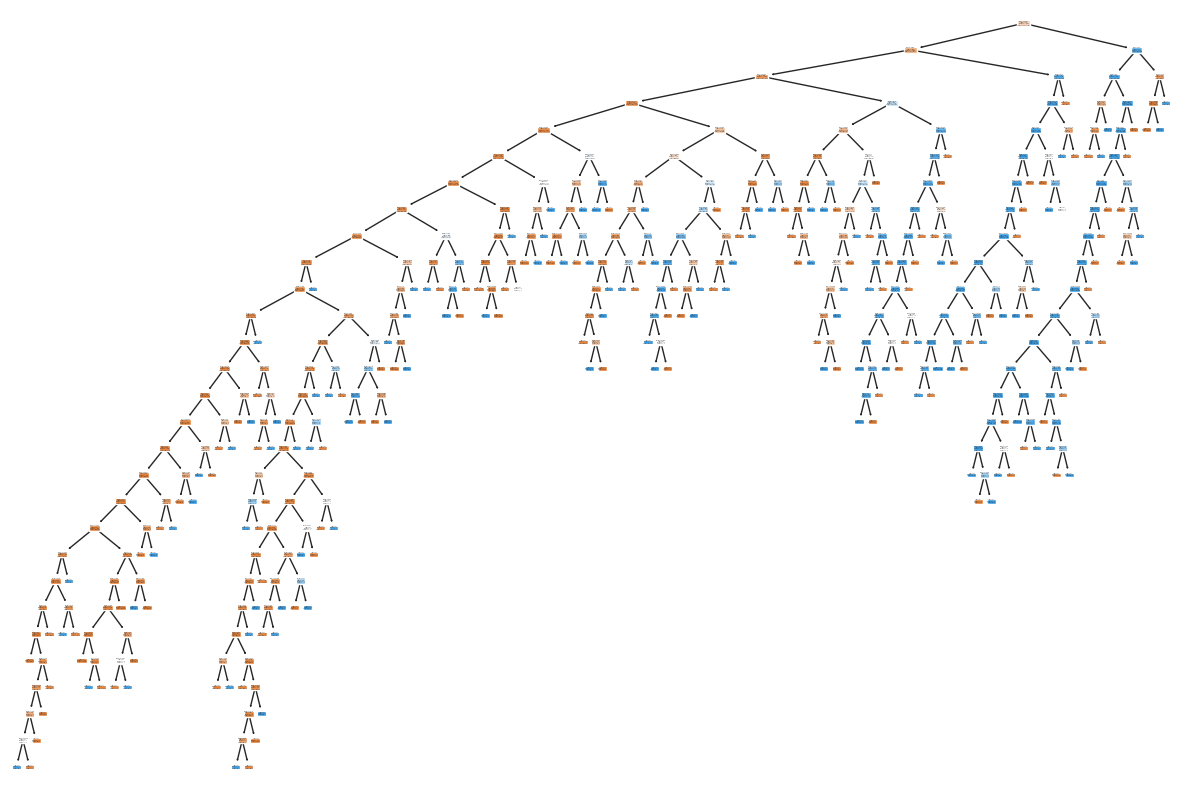

In [119]:
plt.figure(figsize=(20,15))
tree.plot_tree(clf,filled=True)
plt.show()

# Save the model

In [113]:
import pickle

In [114]:
#save model
with open("Decision_Tree.pickle","wb") as file:
 pickle.dump(model, file)

In [115]:
model

DecisionTreeClassifier()